<a href="https://colab.research.google.com/github/Epsita-R/Epsita/blob/main/2348517_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [17]:
#load the data set
data = pd.read_csv('/content/Invistico_Airline.csv')
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


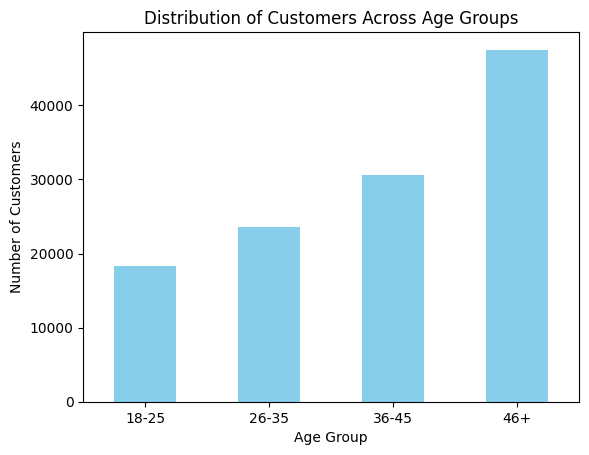

In [18]:
# Create age bins
bin_edges = [18, 26, 36, 46, 100]
bin_labels = ['18-25', '26-35', '36-45', '46+']

# Apply binning to the 'Age' column
data['age_group'] = pd.cut(data['Age'], bins=bin_edges, labels=bin_labels, right=False)

# Create a bar plot to show the distribution of customers across age groups
age_distribution = data['age_group'].value_counts().sort_index()
age_distribution.plot(kind='bar', color='skyblue')

plt.title('Distribution of Customers Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()


In [ ]:
label_encoder = LabelEncoder()
# Convert 'Gender' column to numerical values
data['Gender'] = label_encoder.fit_transform(data['Gender'])
# Convert 'Class' column to numerical values
data['Class'] = label_encoder.fit_transform(data['Class'])
# Display the updated dataset
print(data.head())

In [32]:
# Convert 'satisfaction' to numerical data
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
data['satisfaction'] = data['satisfaction'].map(satisfaction_mapping)

In [33]:
# Calculate the relationship between 'satisfaction' and age groups
satisfaction_age_relation = data.groupby('age_group')['satisfaction'].mean()

# Display the result
print(satisfaction_age_relation)

age_group
18-25    1.0
26-35    1.0
36-45    1.0
46+      1.0
Name: satisfaction, dtype: float64


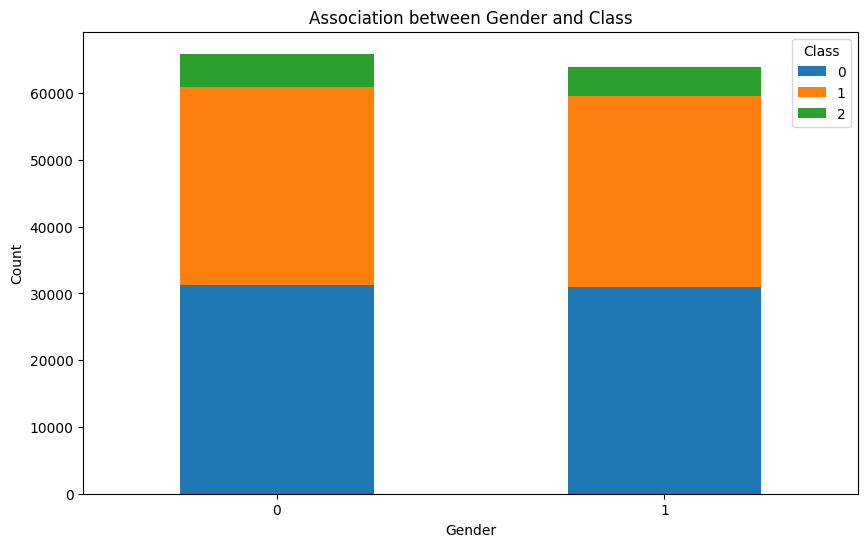

In [34]:

# Calculate association between Gender and Class
association_table = pd.crosstab(data['Gender'], data['Class'])

# Plot the result using a bar plot
association_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Association between Gender and Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()

In [58]:
# Extract data for two groups
group1_data = data[data['Gender'] == 'Male']['satisfaction']
group2_data = data[data['Gender'] == 'Female']['satisfaction']

# Check if both groups have non-empty data
if len(group1_data) == 0 or len(group2_data) == 0:
    print("One or both groups have no data for the analysis.")
else:
    # Calculate mean and standard deviation for each group
    mean_group1 = np.mean(group1_data)
    std_group1 = np.std(group1_data)
    mean_group2 = np.mean(group2_data)
    std_group2 = np.std(group2_data)


One or both groups have no data for the analysis.
